<a href="https://colab.research.google.com/github/neeyora/OLADIPO-Olaniyi-the-Analyst.github.io/blob/main/Trivalley_Customer_Bike_Spending_and_Buying_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
!pip install sweetviz

In [ ]:
# Install Dependencies
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Note: You should restart session once the libraries have been installed. 
# Do not run the other cells untill you restart session.
# Click on "runtime" button at the top bar, then click "restart runtime"
# After that you can run all the cells below without facing any errors

In [ ]:
# import basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import Dataset
df = pd.read_csv("https://raw.githubusercontent.com/josephgitau/data_engineering/master/Trivalley%20Customer%20Spend%20and%20Buyer%20Flag%20Data%20(1).csv")
df.head()

,CustomerID,AveMonthSpend,BikeBuyer,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,...,BirthDate,Age,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,89,0,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,...,4/8/1966,56,Professional,M,M,1,0,0,2,137947
1,11001,117,1,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,...,5/14/1965,56,Professional,M,S,0,1,3,3,101141
2,11002,123,0,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,...,8/12/1965,56,Professional,M,M,1,1,3,3,91945
3,11003,50,0,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,...,2/15/1968,54,Professional,F,S,0,1,0,0,86688
4,11004,95,1,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,...,8/8/1968,53,Professional,F,S,1,4,5,5,92771


In [ ]:
# Auto EDA with sweetviz
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Check for duplicate values
df.duplicated().sum()

98

In [ ]:
# Drop Duplicate Values
df.drop_duplicates(inplace=True)

In [ ]:
# Check for missing values
df.isna().sum()

CustomerID                  0
AveMonthSpend               0
BikeBuyer                   0
Title                   16333
FirstName                   0
MiddleName               6960
LastName                    0
Suffix                  16419
AddressLine1                0
AddressLine2            16146
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Age                         0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

In [ ]:
# drop columns with missing values
df.drop(["Title", "MiddleName", "Suffix", "AddressLine2"], axis=1, inplace=True)

In [ ]:
# Drop uneeded columns
df.drop(["CustomerID", "BirthDate", "PhoneNumber", "PostalCode", "StateProvinceName", "City", "AddressLine1", "FirstName", "LastName"], axis=1, inplace=True)

In [ ]:
df.head()

,AveMonthSpend,BikeBuyer,CountryRegionName,Age,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,89,0,Australia,56,Professional,M,M,1,0,0,2,137947
1,117,1,Australia,56,Professional,M,S,0,1,3,3,101141
2,123,0,Australia,56,Professional,M,M,1,1,3,3,91945
3,50,0,Australia,54,Professional,F,S,0,1,0,0,86688
4,95,1,Australia,53,Professional,F,S,1,4,5,5,92771


In [ ]:
# Export Data for use in tableau
df.to_csv("Trivalley Customer Spend and Buyer Flag Data.csv")

In [ ]:
# prepare Data for machine learning

In [ ]:
# Convert Categorical Features to numeric 
df["CountryRegionName"].replace(['Australia', 'United States', 'Canada', 'Germany','United Kingdom', 'France'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
df["Occupation"].replace(['Professional', 'Management', 'Skilled Manual', 'Clerical','Manual'],
                        [0, 1, 2, 3, 4], inplace=True)
df["Gender"].replace(['M', 'F'],
                        [0, 1], inplace=True)
df["MaritalStatus"].replace(['M', 'S'],
                        [0, 1], inplace=True)

In [ ]:
## Create a regression model with pycaret
import jinja2
from pycaret.regression import *
s = setup(df, target = 'AveMonthSpend')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:22:21
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
BikeBuyer,Categorical
CountryRegionName,Categorical
Age,Numeric
Occupation,Categorical
Gender,Categorical
MaritalStatus,Categorical
HomeOwnerFlag,Categorical
NumberCarsOwned,Categorical
NumberChildrenAtHome,Categorical
TotalChildren,Categorical


In [ ]:
best = compare_models()

In [ ]:
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5105, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

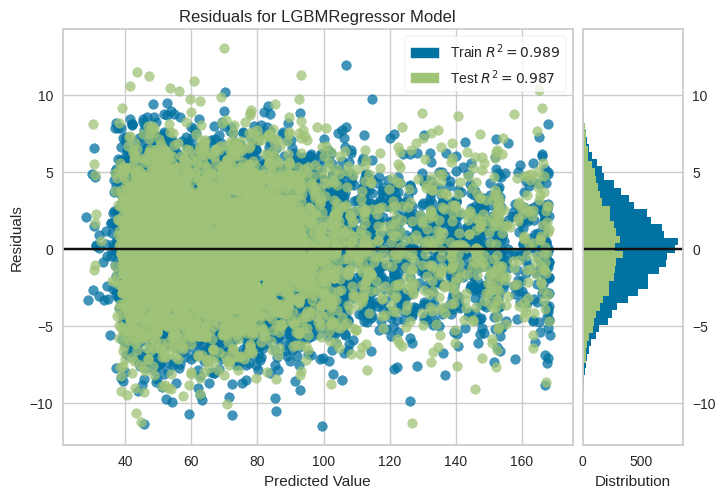

In [ ]:
plot_model(best, plot = 'residuals')

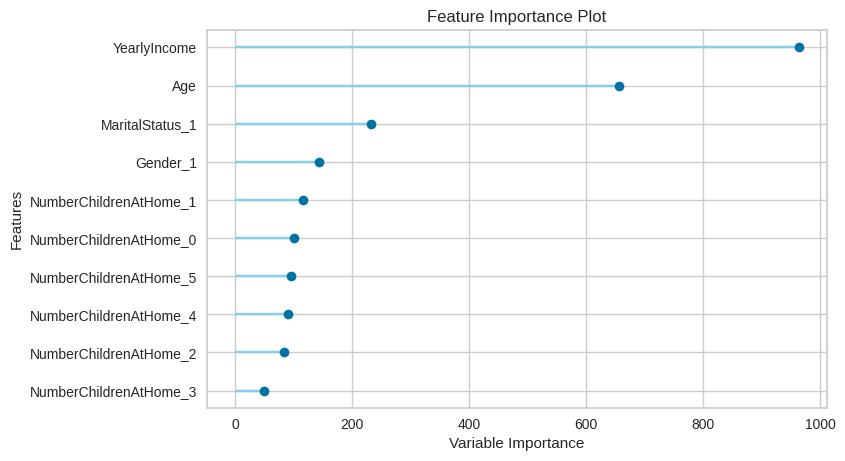

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.5354,10.2053,3.1946,0.9868,0.0509,0.0392


,Age,YearlyIncome,BikeBuyer_1,CountryRegionName_0,CountryRegionName_1,CountryRegionName_2,CountryRegionName_3,CountryRegionName_4,CountryRegionName_5,Occupation_0,...,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_0,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5,AveMonthSpend,Label
0,60.0,61643.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98,91.765626
1,47.0,54880.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68,66.496614
2,50.0,48385.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,63,58.769401
3,57.0,84213.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,90,87.601510
4,68.0,93685.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117,123.260305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,82.0,109636.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74,74.451789
4923,80.0,22565.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40,37.686177
4924,66.0,51030.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43,48.864290
4925,52.0,80963.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93,88.244571


In [ ]:
# Create a classification model
from pycaret.classification import *
s = setup(df, target = 'BikeBuyer')

,Description,Value
0,session_id,6513
1,Target,BikeBuyer
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(16421, 12)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7962,0.8608,0.5844,0.7426,0.6538,0.5123,0.5198,1.308
lightgbm,Light Gradient Boosting Machine,0.7956,0.8579,0.5900,0.7372,0.6552,0.5126,0.5191,0.181
ada,Ada Boost Classifier,0.7878,0.8507,0.6093,0.7067,0.6541,0.5023,0.5054,0.444
ridge,Ridge Classifier,0.7812,0.0000,0.5366,0.7281,0.6176,0.4692,0.4801,0.033
lda,Linear Discriminant Analysis,0.7811,0.8364,0.5443,0.7231,0.6208,0.4713,0.4808,0.085
rf,Random Forest Classifier,0.7701,0.8258,0.5762,0.6784,0.6228,0.4591,0.4626,1.281
et,Extra Trees Classifier,0.7560,0.8009,0.5849,0.6427,0.6121,0.4347,0.4360,1.278
nb,Naive Bayes,0.7468,0.7920,0.4322,0.6825,0.5289,0.3677,0.3857,0.034
lr,Logistic Regression,0.7391,0.7772,0.4320,0.6537,0.5182,0.3509,0.3655,0.116
dt,Decision Tree Classifier,0.7232,0.6897,0.5913,0.5781,0.5845,0.3771,0.3772,0.079


In [ ]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6513, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# Evaluate the best model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

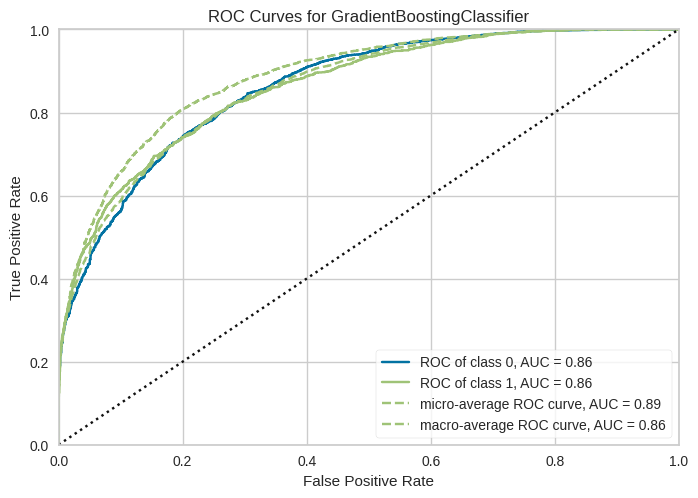

In [ ]:
plot_model(best, plot = 'auc')

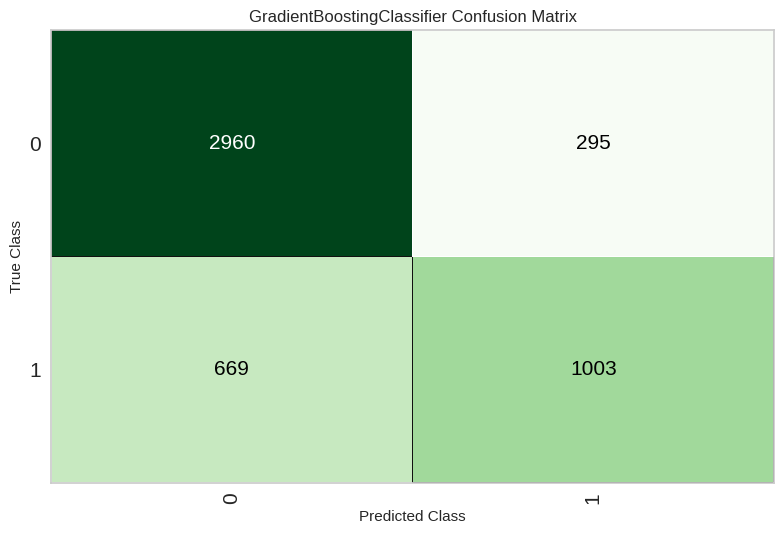

In [ ]:
plot_model(best, plot = 'confusion_matrix')

In [ ]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8043,0.8622,0.5999,0.7727,0.6754,0.5385,0.5474


,AveMonthSpend,Age,YearlyIncome,CountryRegionName_0,CountryRegionName_1,CountryRegionName_2,CountryRegionName_3,CountryRegionName_4,CountryRegionName_5,Occupation_0,...,NumberChildrenAtHome_5,TotalChildren_0,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5,BikeBuyer,Label,Score
0,71.0,55.0,91165.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6230
1,72.0,68.0,78393.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.6960
2,56.0,47.0,40535.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9108
3,53.0,59.0,44088.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8659
4,39.0,42.0,28352.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,86.0,54.0,107543.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7178
4923,88.0,53.0,187383.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8282
4924,53.0,57.0,59073.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8505
4925,57.0,43.0,22747.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8602
